In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [7]:
data.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [9]:
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [10]:
data.drop("date", axis=1, inplace=True)

In [11]:
data

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18
62180,21,67955,5,1,0,61.07,0,1,3,18
62181,25,68560,5,1,0,56.71,0,1,3,19
62182,18,69167,5,1,0,56.71,0,1,3,19


In [39]:
Y_plot = data['number_people'].to_numpy()
Y_plot.shape

(62184,)

In [22]:
X_TEST = data.drop("number_people", axis=1)
X_TEST = X_TEST.to_numpy()
X_TEST.shape

(62184, 9)

# USING PCA TO LOOK AT LILNEARITY
this is just to check if there is any pattern or everything has no realtion 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import svd

In [17]:
def feature_normalization(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma


In [18]:
def pca(X):

    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [19]:
def project_data(X, U, K):
    m,n = X.shape
    U_reduce = U[:,0:K]
    Z = X@U_reduce
    return Z

In [24]:
X_norm2 = feature_normalization(X_TEST)[0]

In [30]:
U2 = pca(X_norm2)[0]

In [31]:
K2 = 1
Z2 = project_data(X_norm2, U2, K2)

In [44]:
X_plot = np.squeeze(Z2, axis=None)

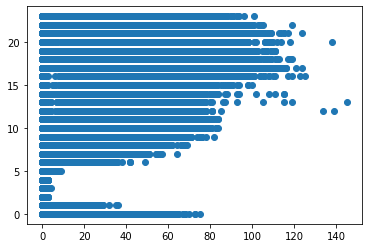

In [53]:
plt.scatter(data['number_people'], data['hour'])

In [ ]:
plt.scatter(X_plot,Y_plot)

# check Correlation

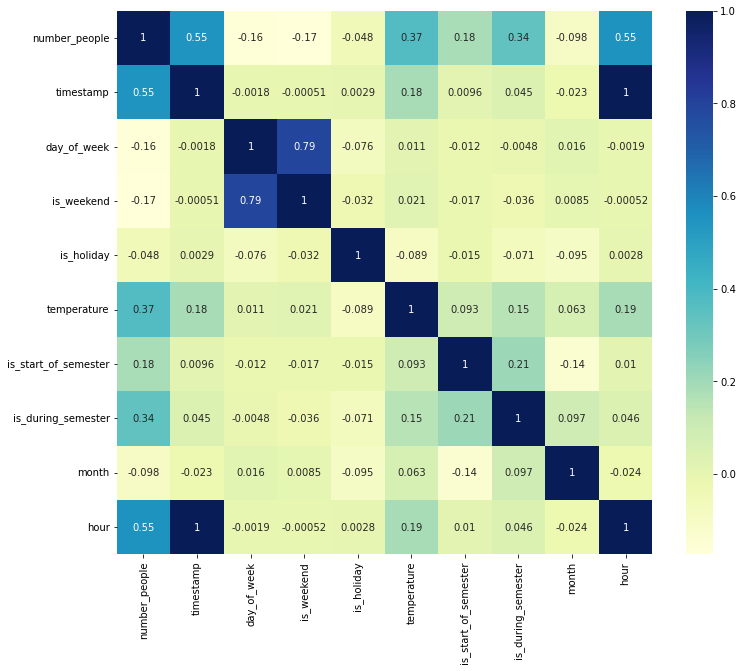

In [61]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot  = True, cmap="YlGnBu")
plt.show()

we can see that days_of_weeks and is_weekend are highly corelated so we can drop is_weekend and use only daya_of_week instead
it's obvious but timestamp and hour are also correlated so u can drop one of those cols too